In [ ]:
import numpy as np
import io
import pandas as pd
import matplotlib as pl
from sklearn.model_selection import train_test_split

import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
#from keras.layers.normalization import BatchNormalization
from keras.layers.normalization import layer_normalization

In [ ]:
from google.colab import drive #case mounted gdrive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


In [ ]:
import os  #case connect via OS
os.chdir("/content/gdrive/")
os.getcwd()

'/content/gdrive'

In [ ]:
path = "/content/gdrive/MyDrive/Colab Notebooks/img"
files = os.listdir(path)
categories = []

for filename in files:
    category = filename.split('.')[0]
    if 'y' in category:
        categories.append("1")
    elif 'w' in category:
        categories.append("0")
    else: pass
df = pd.DataFrame({
    'filename': files,
    'category': categories
})

In [ ]:
print(df.head(18))

   filename category
0    y7.jpg        1
1    y8.jpg        1
2    w1.jpg        0
3    w3.jpg        0
4    y9.jpg        1
5    y6.jpg        1
6    w2.jpg        0
7    y5.jpg        1
8    y4.jpg        1
9    y3.jpg        1
10   y2.jpg        1
11   y1.jpg        1
12   w6.jpg        0
13   w9.jpg        0
14   w7.jpg        0
15   w5.jpg        0
16   w8.jpg        0
17   w4.jpg        0


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

X =  np.empty([0])
y = np.empty([0])
for filename in files:
    print(path+"/"+filename)
    # load the image
    img = load_img(path+"/"+filename)

    #print(type(img))
    #print(img.format)
    #print(img.mode)
    print(img.size)
    img.show()


    # convert to numpy array
    img_array = img_to_array(img)

    X = np.append (X,img_array)
    category = filename.split('.')[0]
    if 'y' in category:
        y = np.append(y,[1])
    elif 'w' in category:
        y = np.append(y,[0])
    else: pass

/content/gdrive/MyDrive/Colab Notebooks/img/y7.jpg
(180, 180)
/content/gdrive/MyDrive/Colab Notebooks/img/y8.jpg
(180, 180)
/content/gdrive/MyDrive/Colab Notebooks/img/w1.jpg
(180, 180)
/content/gdrive/MyDrive/Colab Notebooks/img/w3.jpg
(180, 180)
/content/gdrive/MyDrive/Colab Notebooks/img/y9.jpg
(180, 180)
/content/gdrive/MyDrive/Colab Notebooks/img/y6.jpg
(180, 180)
/content/gdrive/MyDrive/Colab Notebooks/img/w2.jpg
(180, 180)
/content/gdrive/MyDrive/Colab Notebooks/img/y5.jpg
(180, 180)
/content/gdrive/MyDrive/Colab Notebooks/img/y4.jpg
(180, 180)
/content/gdrive/MyDrive/Colab Notebooks/img/y3.jpg
(180, 180)
/content/gdrive/MyDrive/Colab Notebooks/img/y2.jpg
(180, 180)
/content/gdrive/MyDrive/Colab Notebooks/img/y1.jpg
(180, 180)
/content/gdrive/MyDrive/Colab Notebooks/img/w6.jpg
(180, 180)
/content/gdrive/MyDrive/Colab Notebooks/img/w9.jpg
(180, 180)
/content/gdrive/MyDrive/Colab Notebooks/img/w7.jpg
(180, 180)
/content/gdrive/MyDrive/Colab Notebooks/img/w5.jpg
(180, 180)
/content

In [ ]:
X

array([255., 255., 255., ..., 138.,  35.,  56.])

In [ ]:
X = X.reshape(len(y),180,180,3) #create 16 array list, new shape (120*120) , list ละ 3 แถว
x_vector = 180*180*3

In [ ]:
X

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

# **6.1**

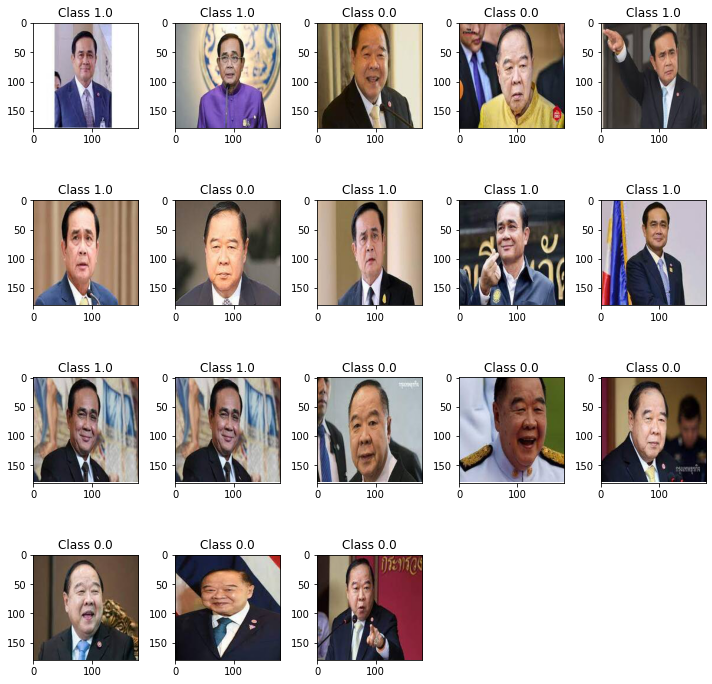

In [ ]:
plt.rcParams['figure.figsize'] = (10,10) # change figure size to plot graph

for i in range(18):
    plt.subplot(4,5,i+1)
    img_array = X[i]
    plt.imshow(np.uint8(img_array))
    plt.title("Class {}".format(y[i]))

plt.tight_layout()

# **6.2**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=1000)
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

#print(type(X_train))
#print(type(y_train))

len_train  = len(X_train)
len_test = len(X_test)

X_train shape (14, 180, 180, 3)
y_train shape (14,)
X_test shape (4, 180, 180, 3)
y_test shape (4,)


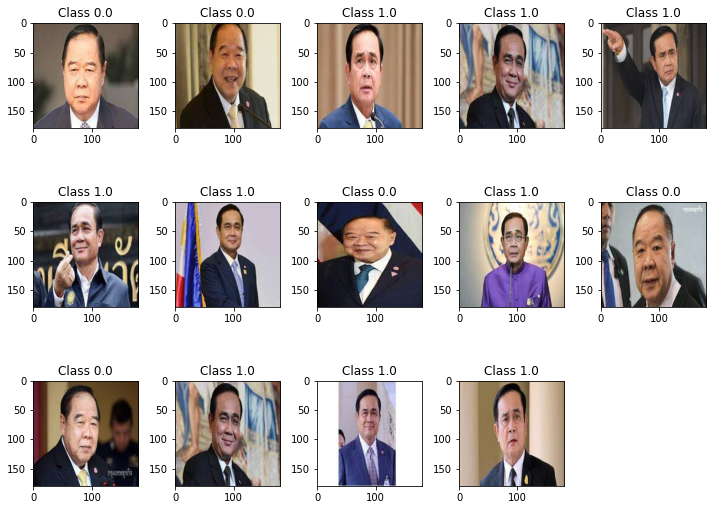

In [ ]:
plt.rcParams['figure.figsize'] = (10,10) # change figure size to plot graph

for i in range(14):
    plt.subplot(4,5,i+1)
    img_array = X_train[i]
    plt.imshow(np.uint8(img_array))
    plt.title("Class {}".format(y_train[i]))

plt.tight_layout()

# **6.5**

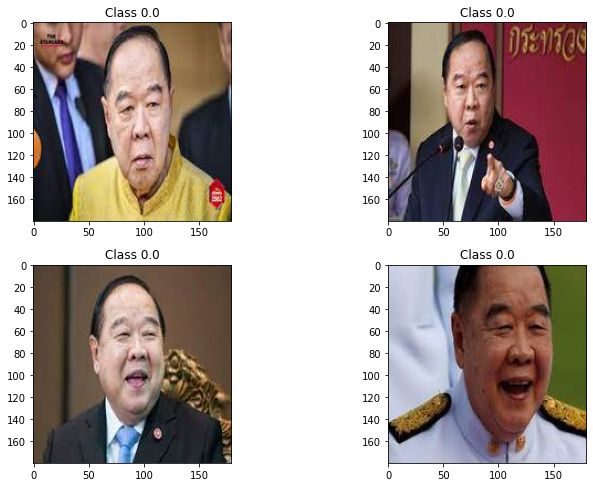

In [ ]:
plt.rcParams['figure.figsize'] = (10,10) # change figure size to plot graph

for i in range(4):
    plt.subplot(3,2,i+1)
    img_array = X_test[i]
    plt.imshow(np.uint8(img_array))
    plt.title("Class {}".format(y_test[i]))

plt.tight_layout()

In [ ]:
X_train = X_train.reshape(len_train, x_vector)
X_test = X_test.reshape(len_test, x_vector)

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255  # it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (14, 97200)
Testing matrix shape (4, 97200)


In [ ]:
nb_classes = 2 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes) #Converts a class vector (integers) to binary class matrix.
Y_test = np_utils.to_categorical(y_test, nb_classes)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

y_train shape (14,)
y_test shape (4,)


In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(x_vector,)))
model.add(Activation('relu'))

In [ ]:
model.add(Dense(8))
model.add(Activation('relu'))

# **6.3**

In [ ]:
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 12)                1166412   
                                                                 
 activation_22 (Activation)  (None, 12)                0         
                                                                 
 dense_23 (Dense)            (None, 8)                 104       
                                                                 
 activation_23 (Activation)  (None, 8)                 0         
                                                                 
 dense_24 (Dense)            (None, 2)                 18        
                                                                 
 activation_24 (Activation)  (None, 2)                 0         
                                                                 
Total params: 1,166,534
Trainable params: 1,166,534
No

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, batch_size=5, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
3/3 [==============================] - 1s 220ms/step - loss: 11.7149 - accuracy: 0.3571 - val_loss: 13.4887 - val_accuracy: 0.0000e+00
Epoch 2/20
3/3 [==============================] - 0s 19ms/step - loss: 6.8932 - accuracy: 0.6429 - val_loss: 4.3393 - val_accuracy: 0.0000e+00
Epoch 3/20
3/3 [==============================] - 0s 21ms/step - loss: 8.2872 - accuracy: 0.2857 - val_loss: 0.0957 - val_accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 0s 20ms/step - loss: 0.8121 - accuracy: 0.7857 - val_loss: 22.7746 - val_accuracy: 0.0000e+00
Epoch 5/20
3/3 [==============================] - 0s 20ms/step - loss: 6.4330 - accuracy: 0.6429 - val_loss: 23.2410 - val_accuracy: 0.0000e+00
Epoch 6/20
3/3 [==============================] - 0s 19ms/step - loss: 3.8766 - accuracy: 0.7143 - val_loss: 4.0886 - val_accuracy: 0.7500
Epoch 7/20
3/3 [==============================] - 0s 24ms/step - loss: 0.6703 - accuracy: 0.8571 - val_loss: 1.8509 - val_accuracy: 0.7500
Epoch 

# **6.4**

In [ ]:
score = model.evaluate(X_train, Y_train, verbose = 0)
print('Train loss : ', score[0])
print('Train accuracy : ', score[1])
score1 = model.evaluate(X_test, Y_test, verbose = 0)
print('Test loss : ', score1[0])
print('Test accuracy : ', score1[1])

Train loss :  2.980230249249871e-07
Train accuracy :  1.0
Test loss :  9.928088188171387
Test accuracy :  0.75


# **6.6**

In [ ]:
import keras
print(keras.backend.backend())
import tensorflow as tf
print(tf.version)

tensorflow
<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
tf.keras.Sequential([model,tf.keras.layers.Softmax()])
result = model.predict(X_test)
for i in range(4):
  print(np.argmax(result[i]))

0
0
0
1
